In [ ]:
install.packages("urca")
library(urca)
install.packages("egcm")
library(egcm)
install.packages("mAr")
library(mAr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘TTR’, ‘zoo’, ‘xts’, ‘tseries’, ‘pracma’, ‘quantmod’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: xts

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS



#Загрузка и визуализация данных

In [ ]:
  data <- read.csv('/content/question_6.csv',header = T)
  head(data)

,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>
1,8.568350,9.141917,4.435812,9.409734
2,5.473472,5.457342,9.390012,6.847860
3,10.795071,4.388311,6.896335,9.961502
4,6.384992,6.870392,7.977238,11.749531
5,6.021424,4.016108,4.725525,11.456281
6,5.817878,7.633890,6.478650,7.482816


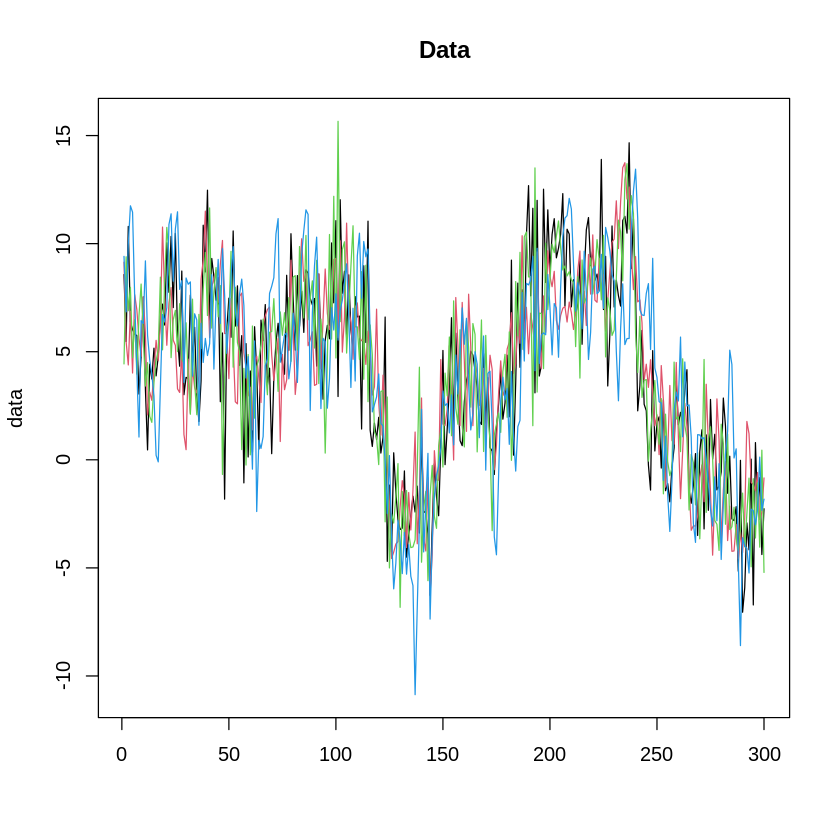

In [ ]:
  matplot(data,type = "l",lty = 1,col = 1:dim(data)[2],main = "Data")

# Оценим модель коинтеграции

In [ ]:
vecm <- ca.jo(data, ecdet = "none",type="eigen",K=2,spec="longrun")

In [ ]:
summary(vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.53256740 0.26626027 0.22671789 0.01691656

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 3 |   5.08  6.50  8.18 11.65
r <= 2 |  76.62 12.91 14.90 19.19
r <= 1 |  92.26 18.90 21.07 25.75
r = 0  | 226.63 24.78 27.14 32.14

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            X1.l2       X2.l2     X3.l2    X4.l2
X1.l2  1.00000000  1.00000000  1.000000 1.000000
X2.l2  0.53001152 -0.77997512 -2.869256 2.924859
X3.l2 -1.49356702  0.03844659 -2.057281 3.897251
X4.l2 -0.01475842 -0.30510908  3.687079 2.200910

Weights W:
(This is the loading matrix)

          X1.l2      X2.l2       X3.l2         X4.l2
X1.d -0.4911082 -0.4286513 -0.03072464 -0.0022567134
X2.d -0.3990565  0.2760691  0.02201009 -0.0045987479
X3.d  0.6207771 -0.1073376

In [ ]:
vecm@cval

,10pct,5pct,1pct
r <= 3 |,6.50,8.18,11.65
r <= 2 |,12.91,14.90,19.19
r <= 1 |,18.90,21.07,25.75
r = 0 |,24.78,27.14,32.14


In [ ]:
vecm@teststat

[1]   5.08426  76.61918  92.26107 226.62904

In [ ]:
vecm@cval[,2]

r <= 3 | r <= 2 | r <= 1 | r = 0  | 
    8.18    14.90    21.07    27.14

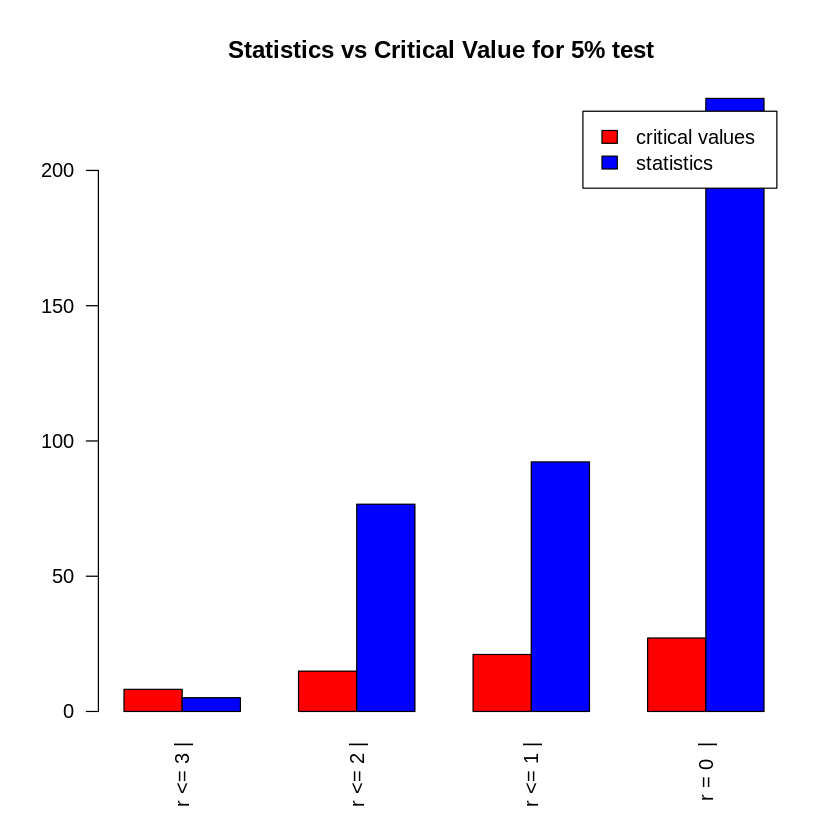

In [ ]:
outmat <-rbind(vecm@cval[,2],vecm@teststat)
legends <- c("critical values","statistics")
barplot(outmat, main="Statistics vs Critical Value for 5% test ",legend.text = legends,beside = TRUE, col=c("red","blue"), las=2)

Проверка гипотезы о порядке коинтеграции показывает, что порядок коинтеграции в нашей смоделированной 4-мерной системе векторов $y_t,h≤3$
.

# вектор lambda- собственные значения $\lambda_1,...,\lambda_n$ матрицы $Σ=Σ^{-1}_{vv}Σ_{uv}Σ^{−1}_{uu}Σ_{uv}$


Оценка модели коинтеграции  

Сначала идет 2-х шаговый МНК

1.1 Оценки параметров множественной регрессионной модели связи Δy_t
 с $Δy_{t−1},Δy_{t−2},...Δy_{t−p+1}$

$Δy_t=π+Π_1Δy_{t−1}...+Π_{p−1}Δy_{t−p+1}+u_t$

1.2 Оценки параметров множественной регрессионной модели связи
y_t
 $с Δy_{t−1},Δy_{t−2},...Δy_{t−p+1}$

$y_t=θ+Λ_1Δy_{t−1}...+Λ_{p−1}Δy_{t−p+1}+v_t$

2.1 Здесь вычисляется ковариационные матрицы остатков

$Σ_{vv}=cov(v_i,v_j);i,j=1,...,n$

$Σ_{uu}=cov(u_i,u_j);i,j=1,...,n$

$Σ_{uv}=cov(u_i,v_j);i,j=1,...,n$

$Σ_{vu}=Σ_{uv}′$



In [ ]:
vecm@lambda

[1] 0.53256740 0.26626027 0.22671789 0.01691656

# Коинтегрирующие вектора

Порядок приняли равным двум a=(a1,a2).
Проверим визуально

In [ ]:
a<- vecm@V[,1:3]
a

,X1.l2,X2.l2,X3.l2
X1.l2,1.00000000,1.00000000,1.000000
X2.l2,0.53001152,-0.77997512,-2.869256
X3.l2,-1.49356702,0.03844659,-2.057281
X4.l2,-0.01475842,-0.30510908,3.687079


Линейная кобинация с первым вектором на вид стационарна.

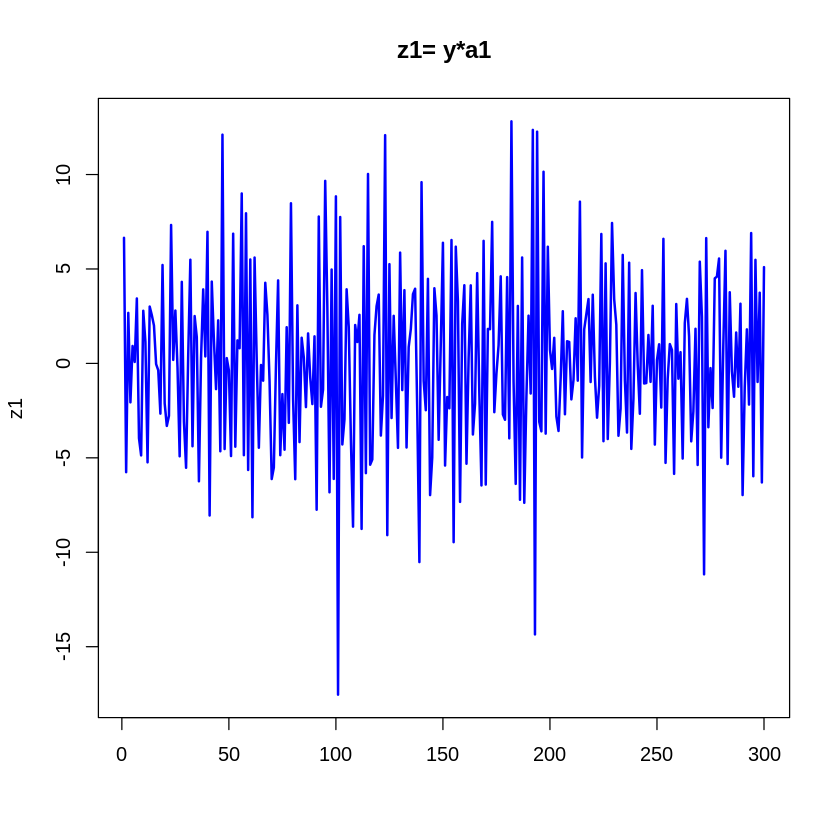

In [ ]:
z1 <- as.matrix(data)%*%vecm@V[,1]
 matplot(z1,type ="l",col = "blue",lwd = 2,main ='z1= y*a1')

Линейная кобинация с вторым вектором на вид стационарна.

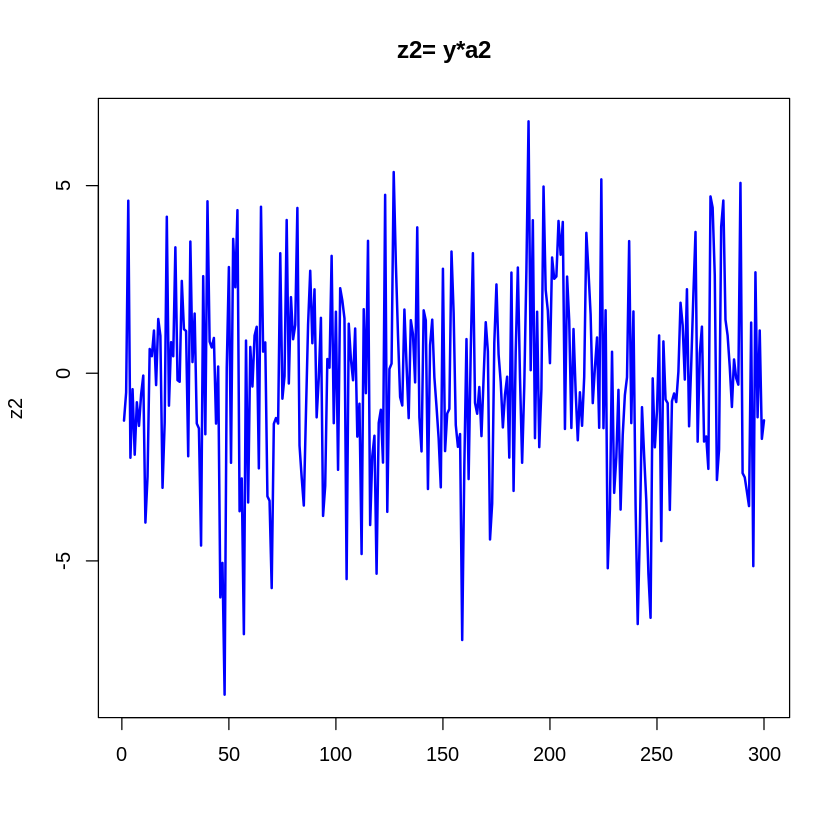

In [ ]:
z2 <- as.matrix(data)%*%vecm@V[,2]
 matplot(z2,type ="l",col = "blue",lwd = 2,main ='z2= y*a2')

если h <= 2 будет что-то такое '''Линейная кобинация с третьим вектором уже содержит явный тренд и не следовательно является стационарной. Таким образом наша гипотеза о порядке коинтеграции h=2
не отвергается и в результате визуального теста.'''

Линейная кобинация с третьим вектором на вид стационарна.

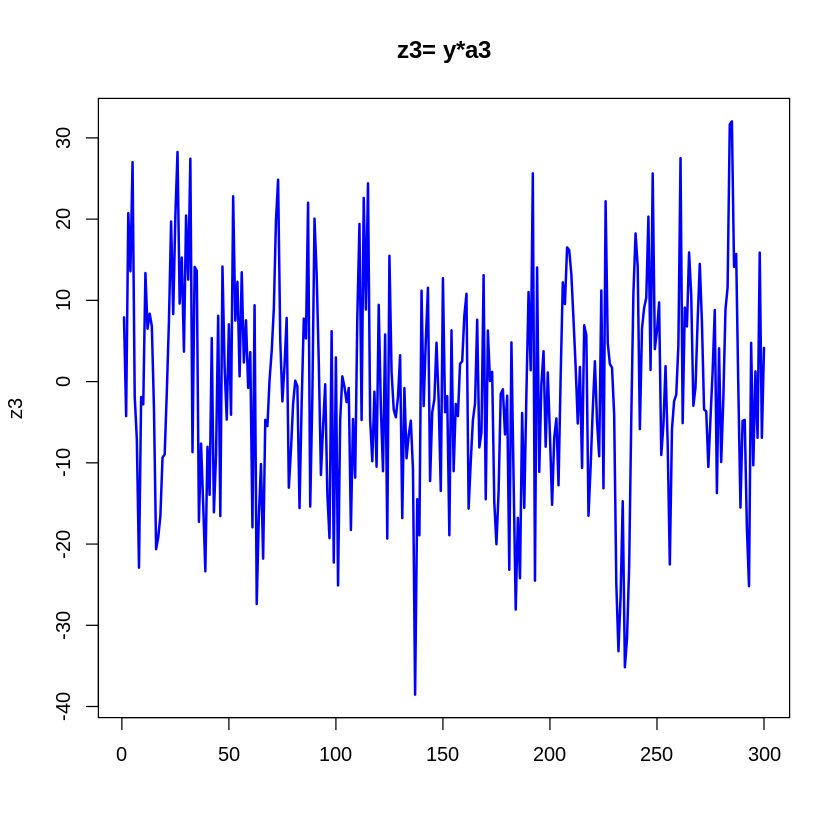

In [ ]:
z3 <- as.matrix(data)%*%vecm@V[,3]
 matplot(z3,type ="l",col = "blue",lwd = 2,main ='z3= y*a3')